## Part 1
### 1. Import Libraries & Data

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os

#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Establish Path
path = r'/Users/claireheger/Documents/Instacart Basket Analysis' 

In [4]:
# Import Data from 4.9
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customer_merge_.pkl'))

In [5]:
ords_prods_merge.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,uder_id,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,0,0,2539329,1,prior,1,2,8,NaN,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,1,2398795,1,prior,2,3,7,15.0,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,2,473747,1,prior,3,3,12,21.0,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,3,2254736,1,prior,4,4,7,29.0,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,4,431534,1,prior,5,4,15,28.0,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
ords_prods_merge.shape

(32404859, 37)

In [7]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 37 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   Unnamed: 0.1           int64   
 1   Unnamed: 0_x           int64   
 2   order_id               int64   
 3   user_id                int64   
 4   eval_set               object  
 5   order_number           int64   
 6   orders_day_of_week     int64   
 7   order_hour_of_day      int64   
 8   days_since_last_order  float64 
 9   uder_id                int64   
 10  product_id             int64   
 11  add_to_cart_order      int64   
 12  reordered              int64   
 13  Unnamed: 0_y           int64   
 14  product_name           object  
 15  aisle_id               int64   
 16  department_id          int64   
 17  prices                 float64 
 18  _merge                 category
 19  busiest_day            object  
 20  busiest_days           object  
 21  busiest_period_of_day  object

In [8]:
ords_prods_merge.loc[:,['days_since_last_order', 'order_frequency_flag']].sample(n=50)

,days_since_last_order,order_frequency_flag
10830438,14.0,Frequent customer
19097753,2.0,Frequent customer
12218971,30.0,Non-frequent customer
25898599,7.0,Frequent customer
22283181,6.0,Frequent customer
20154329,7.0,Frequent customer
23126138,4.0,Frequent customer
13984787,6.0,Frequent customer
4233370,4.0,Regular customer
4957253,30.0,Frequent customer


In [9]:
# Check descriptive statistics for merged data frame

ords_prods_merge.describe()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,uder_id,product_id,...,Unnamed: 0_y,aisle_id,department_id,prices,max_order,avg_price,median_prior_orders,age,n_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,...,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.709858e+06,1.709858e+06,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,1.029372e+05,2.559866e+04,...,2.560037e+04,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.864575e+05,9.864575e+05,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,5.946610e+04,1.408400e+04,...,1.408555e+04,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.556370e+05,8.556370e+05,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,5.142200e+04,1.354400e+04,...,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.709176e+06,1.709176e+06,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,1.026160e+05,2.530200e+04,...,2.530300e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565919e+06,2.565919e+06,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.543890e+05,3.794700e+04,...,3.795100e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421081e+06,3.421081e+06,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,2.062090e+05,4.968800e+04,...,4.969200e+04,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


### 2. Security Implications

Customer names are PII data and should be dropped. They are also irrelevant to the analysis we are conducting. 

In [10]:
# Remove name columns

ords_prods_merge_no_names = ords_prods_merge.drop(columns = ['first_name', 'last_name'])

In [11]:
# Check removal

ords_prods_merge_no_names.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'order_id', 'user_id', 'eval_set',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'uder_id', 'product_id', 'add_to_cart_order',
       'reordered', 'Unnamed: 0_y', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_prior_orders', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income'],
      dtype='object')

In [12]:
# Rename df for ease

ords_prods_merge = ords_prods_merge_no_names

### 3. Customer Behavior Analysis

In [13]:
# Assign states to regions

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [14]:
ords_prods_merge.loc[ords_prods_merge['state'].isin(Northeast), 'region'] = 'Northeast'
ords_prods_merge.loc[ords_prods_merge['state'].isin(Midwest), 'region'] = 'Midwest'
ords_prods_merge.loc[ords_prods_merge['state'].isin(South), 'region'] = 'South'
ords_prods_merge.loc[ords_prods_merge['state'].isin(West), 'region'] = 'West'

In [15]:
ords_prods_merge['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [16]:
# Check data frame

ords_prods_merge.head(20)

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,uder_id,...,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,0,0,2539329,1,prior,1,2,8,NaN,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,1,1,2398795,1,prior,2,3,7,15.0,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2,2,473747,1,prior,3,3,12,21.0,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3,3,2254736,1,prior,4,4,7,29.0,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,4,4,431534,1,prior,5,4,15,28.0,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
5,5,5,3367565,1,prior,6,2,7,19.0,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
6,6,6,550135,1,prior,7,1,9,20.0,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
7,7,7,3108588,1,prior,8,1,14,14.0,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
8,8,8,2295261,1,prior,9,1,16,0.0,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
9,9,9,2550362,1,prior,10,4,8,30.0,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [17]:
# Create crosstab between region and spending habit

crosstab = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spending_flag'], dropna = False)

In [18]:
# Check

crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [19]:
# Copy to clipboard to paste into Excel

crosstab.to_clipboard()

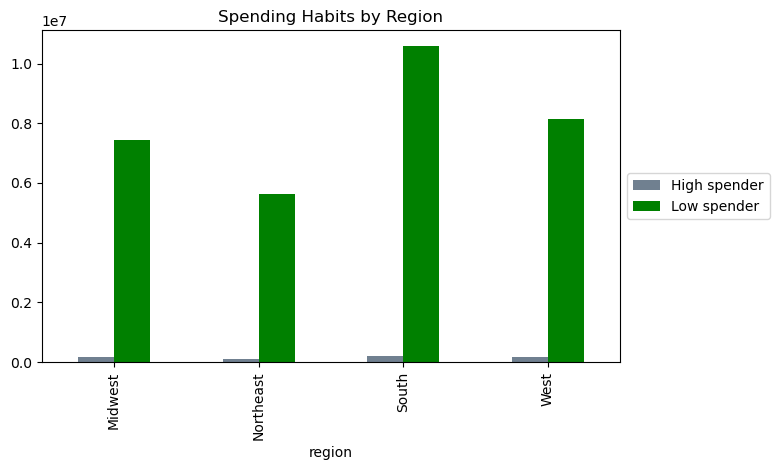

In [20]:
# Create bar chart to read the data more easily

regional_spending_bar = crosstab.plot.bar(color= ['slategrey', 'green'])
plt.title('Spending Habits by Region')
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Low spenders make up a majority of the customers. Southern region makes up the most low spenders, then West, Midwest, and lastly Northeast. There are very little regional differences in high spending across regions. 

### 4. Exclusion Flag

In [21]:
# Create exclusion flag variable 

ords_prods_merge.loc[ords_prods_merge['max_order']>= 5, 'customer_activity'] = 'High activity customer'
ords_prods_merge.loc[ords_prods_merge['max_order']< 5, 'customer_activity'] = 'Low activity customer'

In [22]:
# Check

ords_prods_merge['customer_activity'].value_counts (dropna = False)

High activity customer    30964564
Low activity customer      1440295
Name: customer_activity, dtype: int64

In [23]:
# Create subset for low-activity customers

low_activity_cust = ords_prods_merge[ords_prods_merge['customer_activity'] == 'Low activity customer']

In [24]:
low_activity_cust.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,uder_id,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity
1510,1744,1744,520620,120,prior,1,3,11,NaN,120,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity customer
1511,1746,1746,3273029,120,prior,3,2,8,19.0,120,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity customer
1512,1744,1744,520620,120,prior,1,3,11,NaN,120,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity customer
1513,1746,1746,3273029,120,prior,3,2,8,19.0,120,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity customer
1514,1744,1744,520620,120,prior,1,3,11,NaN,120,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity customer


In [25]:
low_activity_cust.shape

(1440295, 37)

In [26]:
high_activity_cust = ords_prods_merge[ords_prods_merge['customer_activity'] == 'High activity customer']

In [27]:
high_activity_cust.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,uder_id,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,customer_activity
0,0,0,2539329,1,prior,1,2,8,NaN,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer
1,1,1,2398795,1,prior,2,3,7,15.0,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer
2,2,2,473747,1,prior,3,3,12,21.0,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer
3,3,3,2254736,1,prior,4,4,7,29.0,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer
4,4,4,431534,1,prior,5,4,15,28.0,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer


In [28]:
high_activity_cust.shape

(30964564, 37)

In [29]:
# Export

low_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [30]:
# Rename

active_cust = high_activity_cust

### Final Report Charts

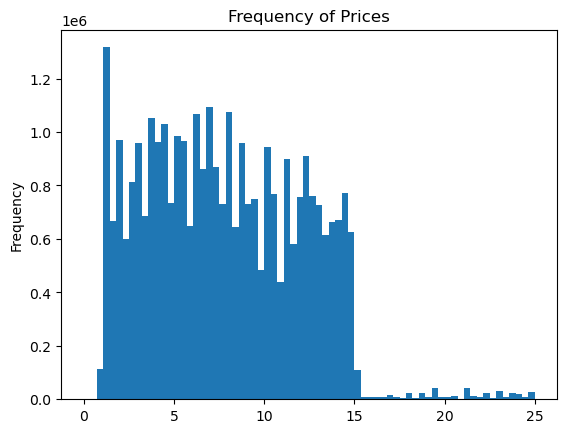

In [31]:
#histogram of prices column

hist_prices = ords_prods_merge['prices'].plot.hist(bins = 70, title = 'Frequency of Prices', range = [0 ,25])

Text(0.5, 1.0, 'Number of Orders by Day')

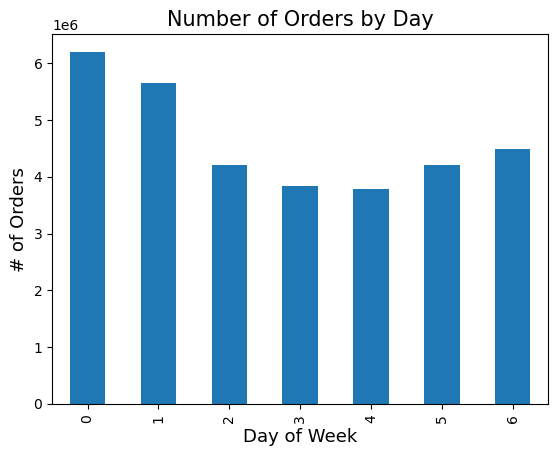

In [32]:
# Orders per day of week 
bar_dow = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel("Day of Week", fontsize=13)
plt.ylabel("# of Orders", fontsize=13)  
plt.title("Number of Orders by Day", fontsize=15)

#### Key Question 3 Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Text(0.5, 1.0, 'Frequency of Prices')

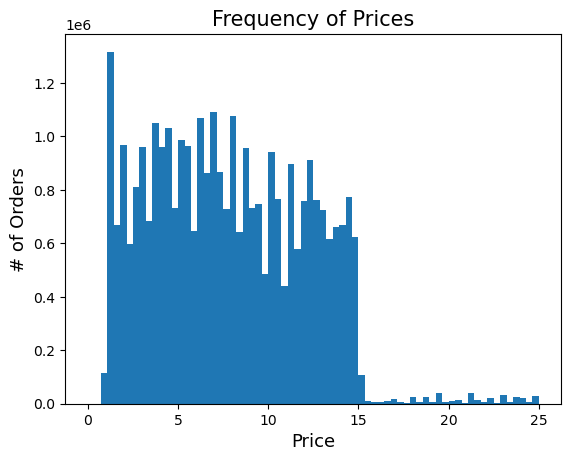

In [33]:
#histogram for frequency of prices 
hist_prices = ords_prods_merge['prices'].plot.hist(bins = 70, range = [0 ,25])
plt.xlabel("Price", fontsize=13)
plt.ylabel("# of Orders", fontsize=13)  
plt.title("Frequency of Prices", fontsize=15)

In [34]:
# Export the visualization 
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'price_frequency.png'))

In [35]:
# Create bins for price range
bins = [-float("inf"), 6, 15, float("inf")]
labels = ['Low range', 'Mid range', 'High range']

# Create a new column 'price_range' based on the 'price' column and the specified bins
ords_prods_merge['price_range'] = pd.cut(ords_prods_merge['prices'], bins=bins, labels=labels)

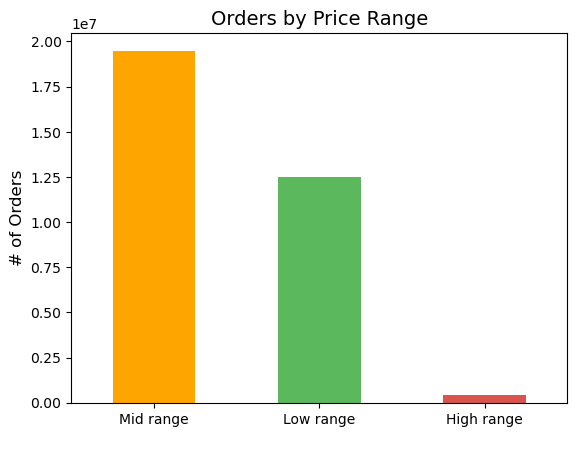

In [36]:
# Price Groupings
bar_price_group = ords_prods_merge['price_range'].value_counts()
bar_price_group = bar_price_group.plot(kind='bar', color=['#ffA500','#5cb85c', '#d9534f'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("# of Orders", fontsize=12)  
plt.title("Orders by Price Range", fontsize=14)
plt.show()


In [37]:
# Export visual
bar_price_group.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'order_price_range.png'))

In [38]:
#import department data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [39]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [40]:
df_dept.shape

(21, 2)

In [41]:
# Create data dictionary for values in the "department_id" column

data_dict = df_dept.to_dict('index')

In [42]:
data_dict

{0: {'Unnamed: 0': 1, 'department': 'frozen'},
 1: {'Unnamed: 0': 2, 'department': 'other'},
 2: {'Unnamed: 0': 3, 'department': 'bakery'},
 3: {'Unnamed: 0': 4, 'department': 'produce'},
 4: {'Unnamed: 0': 5, 'department': 'alcohol'},
 5: {'Unnamed: 0': 6, 'department': 'international'},
 6: {'Unnamed: 0': 7, 'department': 'beverages'},
 7: {'Unnamed: 0': 8, 'department': 'pets'},
 8: {'Unnamed: 0': 9, 'department': 'dry goods pasta'},
 9: {'Unnamed: 0': 10, 'department': 'bulk'},
 10: {'Unnamed: 0': 11, 'department': 'personal care'},
 11: {'Unnamed: 0': 12, 'department': 'meat seafood'},
 12: {'Unnamed: 0': 13, 'department': 'pantry'},
 13: {'Unnamed: 0': 14, 'department': 'breakfast'},
 14: {'Unnamed: 0': 15, 'department': 'canned goods'},
 15: {'Unnamed: 0': 16, 'department': 'dairy eggs'},
 16: {'Unnamed: 0': 17, 'department': 'household'},
 17: {'Unnamed: 0': 18, 'department': 'babies'},
 18: {'Unnamed: 0': 19, 'department': 'snacks'},
 19: {'Unnamed: 0': 20, 'department': 'deli

In [43]:
#assign department id values for each value

ords_prods_merge.loc[ords_prods_merge['department_id'] == 1, 'department'] = 'frozen'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 2, 'department'] = 'other'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 3, 'department'] = 'bakery'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 4, 'department'] = 'produce'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 5, 'department'] = 'alcohol'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 6, 'department'] = 'international'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 7, 'department'] = 'beverages'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 8, 'department'] = 'pets'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 9, 'department'] = 'dry goods pasta'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 10, 'department'] = 'bulk'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 11, 'department'] = 'personal care'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 12, 'department'] = 'meat seafood'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 13, 'department'] = 'pantry'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 14, 'department'] = 'breakfast'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 15, 'department'] = 'canned goods'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 16, 'department'] = 'dairy eggs'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 17, 'department'] = 'household'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 18, 'department'] = 'babies'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 19, 'department'] = 'snacks'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 20, 'department'] = 'deli'
ords_prods_merge.loc[ords_prods_merge['department_id'] == 21, 'department'] = 'missing'

In [44]:
ords_prods_merge['department'].value_counts(dropna=False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [45]:
#check shape

ords_prods_merge['department'].shape

(32404859,)

In [46]:
#assign age groups

ords_prods_merge.loc[(ords_prods_merge['age'] <= 24) & (ords_prods_merge['age'] >= 18), 'age_group'] = '18-24'
ords_prods_merge.loc[(ords_prods_merge['age'] <= 34) & (ords_prods_merge['age'] >= 25), 'age_group'] = '25-34'
ords_prods_merge.loc[(ords_prods_merge['age'] <= 50) & (ords_prods_merge['age'] >= 35), 'age_group'] = '35-50'
ords_prods_merge.loc[(ords_prods_merge['age'] <= 64) & (ords_prods_merge['age'] >= 51),  'age_group'] = '51-64'
ords_prods_merge.loc[(ords_prods_merge['age'] > 65), 'age_group'] = '65+'

In [47]:
ords_prods_merge['age_group'].value_counts(dropna=False)

35-50    8134570
65+      8088101
51-64    7067550
25-34    5054654
18-24    3573001
NaN       486983
Name: age_group, dtype: int64

In [48]:
#assign income groups
ords_prods_merge.loc[ords_prods_merge['income'] < 45000, 'income_group'] = 'Low Income'
ords_prods_merge.loc[(ords_prods_merge['income'] <= 130000) & (ords_prods_merge['income'] >=45000), 'income_group'] = 'Middle Income'
ords_prods_merge.loc[ords_prods_merge['income'] > 130000, 'income_group'] = 'High Income'

In [49]:
ords_prods_merge['income_group'].value_counts(dropna=False)

Middle Income    21996435
High Income       7713528
Low Income        2694896
Name: income_group, dtype: int64

In [50]:
#Create households
ords_prods_merge.loc[ords_prods_merge['n_dependants'] > 0, 'dependents_group'] = 'Parent'
ords_prods_merge.loc[ords_prods_merge['n_dependants'] == 0, 'dependents_group'] = 'No Children'

In [51]:
#Customer profiles
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['n_dependants'] > 0), 'customer_profile'] = 'Single Parent'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['gender'] == 'Female') & (ords_prods_merge['n_dependants'] == 0), 'customer_profile'] = 'Single Female w/o Children'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['gender'] == 'Male') & (ords_prods_merge['n_dependants'] == 0), 'customer_profile'] = 'Single Male w/o Children'
ords_prods_merge.loc[(ords_prods_merge['age'] < 30) & (ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['n_dependants'] > 0), 'customer_profile'] = 'Married Young Parent'
ords_prods_merge.loc[(ords_prods_merge['age'] >= 30) & (ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['n_dependants'] > 0), 'customer_profile'] = 'Married Older Parent'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['n_dependants'] == 0), 'customer_profile'] = 'Married Young Parent'


In [52]:
ords_prods_merge['customer_profile'].value_counts(dropna=False)

Married Older Parent          19730145
Single Male w/o Children       4060918
Single Female w/o Children     4036585
Married Young Parent           3026608
Single Parent                  1550603
Name: customer_profile, dtype: int64

In [53]:
# customer income profiles
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['income_group'] == 'Low Income') & (ords_prods_merge['n_dependants'] > 0), 'customer_income_profile'] = 'Low income single parent'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['income_group'] == 'Middle Income') & (ords_prods_merge['n_dependants'] > 0), 'customer_income_profile'] = 'Middle income single parent'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['income_group'] == 'High Income') & (ords_prods_merge['n_dependants'] > 0), 'customer_income_profile'] = 'High income single parent'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['income_group'] == 'Low Income') & (ords_prods_merge['gender'] == 'Female') & (ords_prods_merge['n_dependants'] == 0), 'customer_income_profile'] = 'Low income single female without children'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['income_group'] == 'Low Income') & (ords_prods_merge['gender'] == 'Female') & (ords_prods_merge['n_dependants'] == 0), 'customer_income_profile'] = 'Low income single female without children'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['income_group'] == 'High Income') & (ords_prods_merge['gender'] == 'Female') & (ords_prods_merge['n_dependants'] == 0), 'customer_income_profile'] = 'High income single female without children'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['income_group'] == 'Low Income') & (ords_prods_merge['gender'] == 'Male') & (ords_prods_merge['n_dependants'] == 0), 'customer_income_profile'] = 'Low income single male without children'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['income_group'] == 'Middle Income') & (ords_prods_merge['gender'] == 'Male') & (ords_prods_merge['n_dependants'] == 0), 'customer_income_profile'] = 'Middle income single male without children'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] != 'married') & (ords_prods_merge['income_group'] == 'High Income') & (ords_prods_merge['gender'] == 'Male') & (ords_prods_merge['n_dependants'] == 0), 'customer_income_profile'] = 'High income single male without children'
ords_prods_merge.loc[(ords_prods_merge['age'] < 30) & (ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['income_group'] == 'Low Income')  & (ords_prods_merge['n_dependants'] >0), 'customer_income_profile'] = 'Low income married young parent'
ords_prods_merge.loc[(ords_prods_merge['age'] < 30) & (ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['income_group'] == 'Middle Income')  & (ords_prods_merge['n_dependants'] >0), 'customer_income_profile'] = 'Middle income married young parent'
ords_prods_merge.loc[(ords_prods_merge['age'] < 30) & (ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['income_group'] == 'High Income')  & (ords_prods_merge['n_dependants'] >0), 'customer_income_profile'] = 'High income married young parent'
ords_prods_merge.loc[(ords_prods_merge['age'] >= 30) & (ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['income_group'] == 'Low Income')  & (ords_prods_merge['n_dependants'] >0), 'customer_income_profile'] = 'Low income married older parent'
ords_prods_merge.loc[(ords_prods_merge['age'] >= 30) & (ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['income_group'] == 'Middle Income')  & (ords_prods_merge['n_dependants'] >0), 'customer_income_profile'] = 'Middle income married older parent'
ords_prods_merge.loc[(ords_prods_merge['age'] >= 30) & (ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['income_group'] == 'High Income')  & (ords_prods_merge['n_dependants'] >0), 'customer_income_profile'] = 'High income married older parent'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['income_group'] == 'Low Income')  & (ords_prods_merge['n_dependants'] == 0), 'customer_income_profile'] = 'Low income married without children'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['income_group'] == 'Middle Income')  & (ords_prods_merge['n_dependants'] == 0), 'customer_income_profile'] = 'Middle income married without children'
ords_prods_merge.loc[(ords_prods_merge['fam_status'] == 'married') & (ords_prods_merge['income_group'] == 'High Income')  & (ords_prods_merge['n_dependants'] == 0), 'customer_income_profile'] = 'High income married without children'

In [54]:
ords_prods_merge['customer_income_profile'].value_counts(dropna=False)

Middle income married older parent            12533761
High income married older parent               5706529
Middle income single male without children     2752078
NaN                                            2724100
Middle income married young parent             2632747
Low income married older parent                1489855
Middle income single parent                    1353749
High income single female without children      977015
High income single male without children        976149
Low income married young parent                 357898
Low income single female without children       335470
Low income single male without children         332691
Low income single parent                        178982
High income married young parent                 35963
High income single parent                        17872
Name: customer_income_profile, dtype: int64

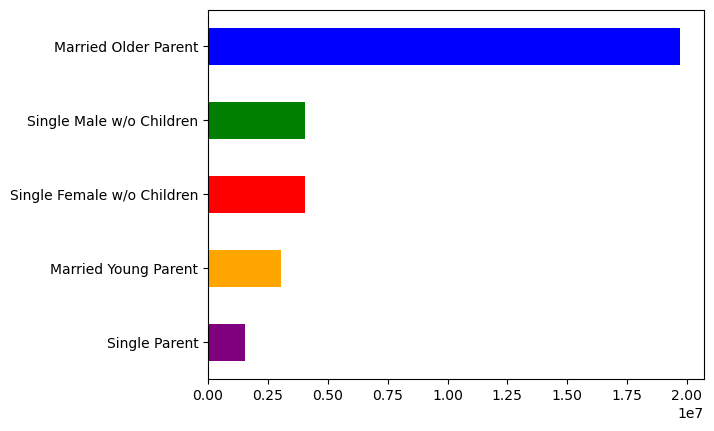

In [55]:
#create bar chart from customer profile

bar = ords_prods_merge['customer_profile'].value_counts().sort_values(ascending=True).plot.barh(color =['purple', 'orange', 'red', 'green', 'blue'])

In [56]:
# Export visual
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'customer_profile.png'))

Text(0.5, 0, '# of Orders')

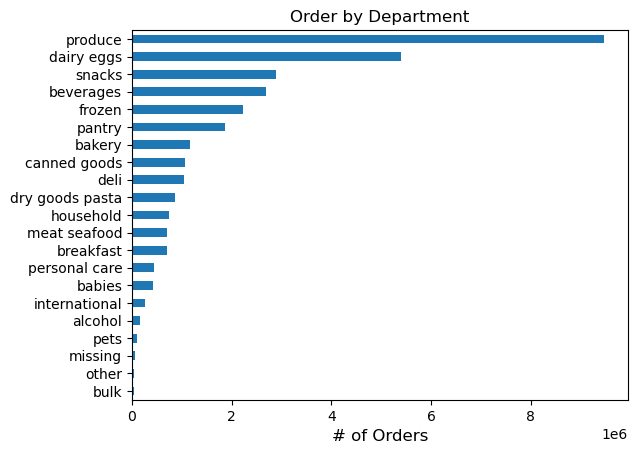

In [57]:
# Department bar chart

bar_dept = ords_prods_merge['department'].value_counts().sort_values(ascending=True)
bar_dept.plot.barh (title = 'Order by Department')
plt.xlabel("# of Orders", fontsize=12)  

Text(0, 0.5, 'Number of Customers')

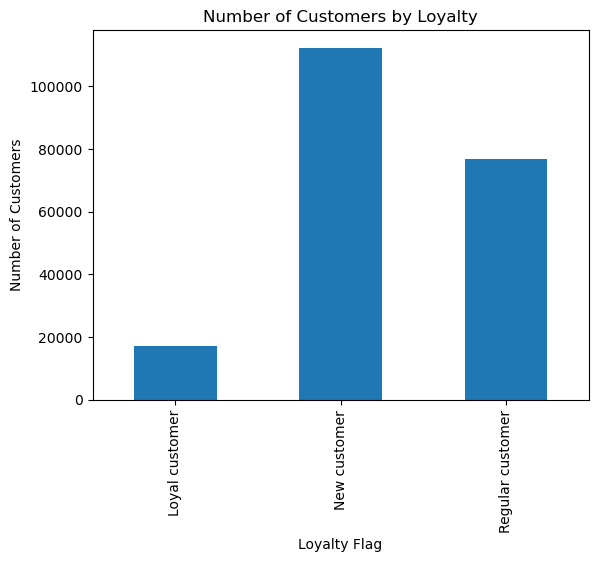

In [58]:
# Loyalty Chart

loyalty_customers = ords_prods_merge.groupby('loyalty_flag')['user_id'].nunique()
bar_loyalty_customers = loyalty_customers.plot.bar(title = "Number of Customers by Loyalty")
plt.xlabel("Loyalty Flag")
plt.ylabel("Number of Customers")


In [59]:
# Export visual
bar_loyalty_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'customer_loyalty.png'))

Text(0.5, 1.0, 'Number of Orders by Loyalty')

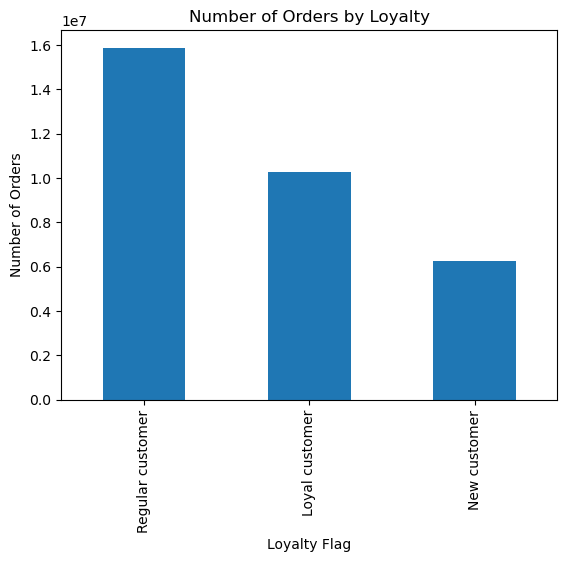

In [60]:
# loyalty status ordering habits
habits = ords_prods_merge['loyalty_flag'].value_counts()
bar_habits = habits.plot.bar(title = "Number of Customers by Loyalty")
plt.xlabel("Loyalty Flag")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Loyalty")

In [61]:
# Export visual
bar_habits.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'loyalty_habits.png'))

Text(0.5, 0, 'Number of Orders')

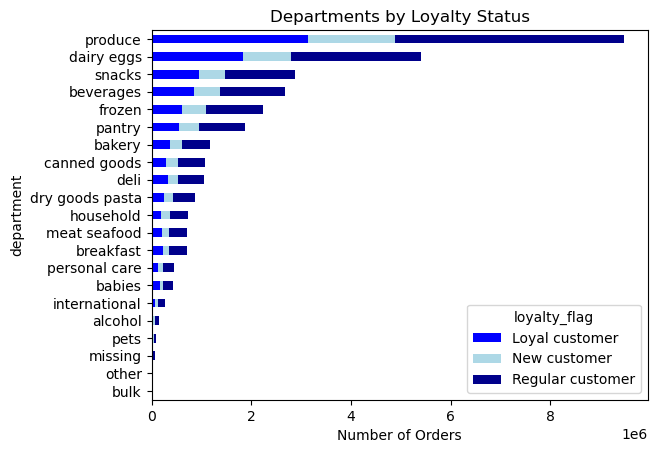

In [62]:
# Group departments and loyalty flag

dep_loyalty = ords_prods_merge.groupby(['department', 'loyalty_flag']).size().unstack()
dep_loyalty = dep_loyalty.loc[dep_loyalty.sum(axis=1).sort_values(ascending=True).index]

# Bar chart
bar_dep_loyalty = dep_loyalty.plot.barh(stacked = True, title = 'Departments by Loyalty Status', color = ['blue','lightblue','darkblue'])
plt.xlabel("Number of Orders")

In [63]:
# Export visual
bar_dep_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'loyalty_depts.png'))

In [64]:
#Income category got messed up. Resetting it. 
low_income_threshold = 67004
high_income_threshold = 127912

In [65]:
# Setting the threshold of each income tier using if then logic
def categorize_income(income):
    if income<=low_income_threshold:
        return 'Low income'
    elif low_income_threshold < income <= high_income_threshold:
        return 'Regular income'
    else:
        return "High income"

In [66]:
ords_prods_merge['income_status'] = ords_prods_merge['income'].apply(categorize_income)

In [67]:
ords_prods_merge['income_status'].value_counts()

Regular income    16202177
Low income         8101644
High income        8101038
Name: income_status, dtype: int64

In [68]:
#Crosstab region to income
crosstab_income_region = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['income_status'], dropna=False)

In [69]:
crosstab_income_region

income_status,High income,Low income,Regular income
region,,,
Midwest,1928043,1876433,3792849
Northeast,1440856,1429459,2852421
South,2666255,2716231,5409399
West,2065884,2079521,4147508


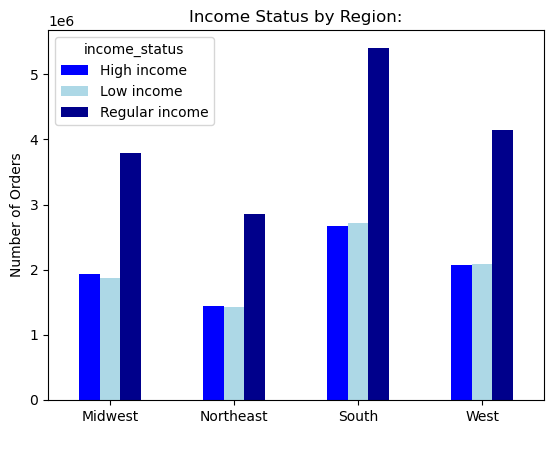

In [70]:
#Income status by region chart
crossbar_income_region = crosstab_income_region.plot.bar(color=['blue','lightblue','darkblue'])
plt.xlabel(" ")
plt.xticks(rotation=0)
plt.ylabel("Number of Orders")  
plt.title("Income Status by Region:")
plt.show()

In [71]:
# Export visual
crossbar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'region_income.png'))

In [72]:
# Department by income
crosstab_income_dept = pd.crosstab(ords_prods_merge['department'], ords_prods_merge['income_status'], dropna=False)

In [73]:
crosstab_income_dept

income_status,High income,Low income,Regular income
department,,,
alcohol,42993,39749,70954
babies,109102,86454,228246
bakery,303285,277207,591936
beverages,646054,776586,1265483
breakfast,170643,196565,335825
bulk,7803,9688,17082
canned goods,280071,235704,552283
dairy eggs,1371098,1280403,2747246
deli,262958,259807,528484


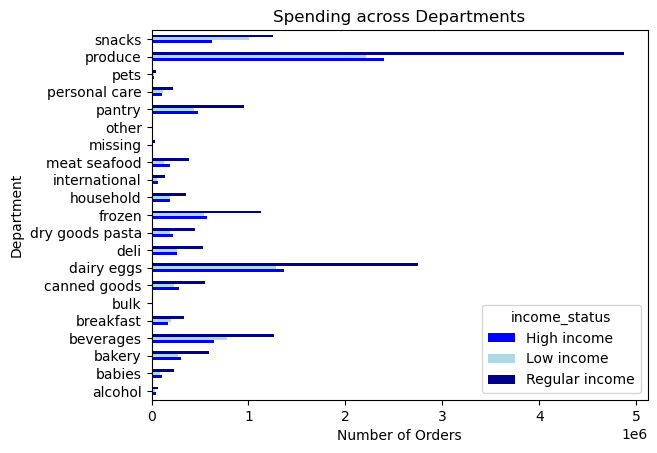

In [74]:
#Orders by Department & Income
crossbar_income_dept = crosstab_income_dept.plot.barh(color=['blue','lightblue','darkblue'])
plt.ylabel("Department")
plt.xticks(rotation=0)
plt.xlabel("Number of Orders")  
plt.title("Spending across Departments")
plt.show()

In [75]:
# Export visual
crossbar_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'dept_income.png'))

In [76]:
# loyalty by region
crosstab_loyalty_region = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['loyalty_flag'], dropna=False)

In [77]:
crosstab_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


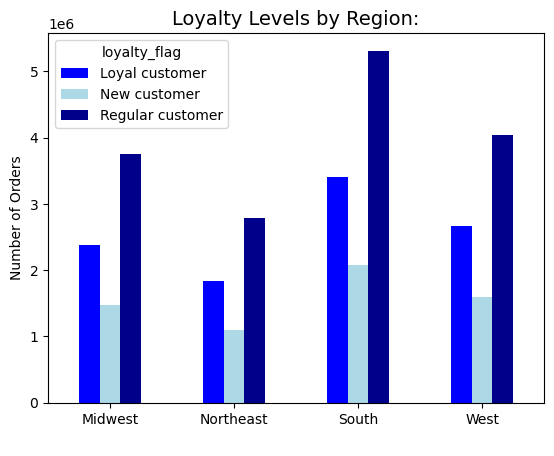

In [78]:
crossbar_loyalty_region = crosstab_loyalty_region.plot.bar(color=['blue','lightblue','darkblue'])
plt.xlabel(" ")
plt.xticks(rotation=0)
plt.ylabel("Number of Orders")  
plt.title("Loyalty Levels by Region:", fontsize=14)
plt.show()

In [79]:
# Export visual
crossbar_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'loyalty_region.png'))

In [80]:
# spending habit by region
crosstab_habit_region = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spending_flag'], dropna=False)

In [81]:
crosstab_habit_region

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


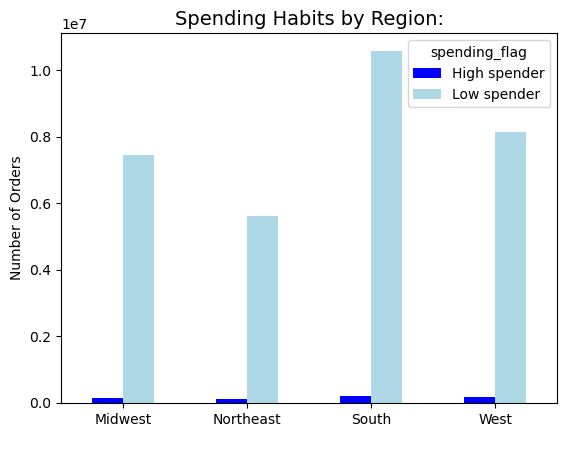

In [82]:
crossbar_habit_region = crosstab_habit_region.plot.bar(color=['blue','lightblue'])
plt.xlabel(" ")
plt.xticks(rotation=0)
plt.ylabel("Number of Orders")  
plt.title("Spending Habits by Region:", fontsize=14)
plt.show()

In [83]:
crossbar_habit_region.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'habit_region.png'))

In [84]:
# Export to pickle file
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'opm.pkl'))